In [3]:
import sqlite3

db_file = "data/kbo_database.db"
connection = sqlite3.connect(db_file, isolation_level=None, check_same_thread=False)
cursor = connection.cursor()



In [3]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [4]:
# Fetch and print the table names
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the connection
connection.close()

Tables in the database:
denomination
branch
activity
establishment
address
contact
meta
code
enterprise


In [6]:
# Connect to the SQLite database file
connection = sqlite3.connect(db_file, isolation_level=None, check_same_thread=False)

# Create a cursor object
cursor = connection.cursor()

# Query to fetch column names from a specific table
table_name = "denomination"
cursor.execute(f"PRAGMA table_info({table_name});")

# Fetch and display column names
columns = cursor.fetchall()
for column in columns:
    print(column[1])  # The second element contains the column name

# Close the connection
connection.close()


EntityNumber
Language
TypeOfDenomination
Denomination


In [7]:
# Connect to the SQLite database file
connection = sqlite3.connect(db_file, isolation_level=None, check_same_thread=False)

# Create a cursor object
cursor = connection.cursor()

# Querying to fetchin column names from a specific table
table_name = "Branch"
cursor.execute(f"PRAGMA table_info({table_name});")

# Fetching and displaying column names
columns = cursor.fetchall()
for column in columns:
    print(column[1])  # The second element contains the column name

# Close the connection
connection.close()

Id
StartDate
EnterpriseNumber


In [7]:


# Connect to the SQLite database

#  database file path
db_path = "data/kbo_database.db"  
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()


for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    
    # Get column information
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
   
    
    # Print column names
    for column in columns:
        print(f"  Column: {column[1]}")  # column[1] contains the column name
    print('./n')
# Close the connection
connection.close()

Table: denomination
  Column: EntityNumber
  Column: Language
  Column: TypeOfDenomination
  Column: Denomination
./n
Table: branch
  Column: Id
  Column: StartDate
  Column: EnterpriseNumber
./n
Table: activity
  Column: EntityNumber
  Column: ActivityGroup
  Column: NaceVersion
  Column: NaceCode
  Column: Classification
./n
Table: establishment
  Column: EstablishmentNumber
  Column: StartDate
  Column: EnterpriseNumber
./n
Table: address
  Column: EntityNumber
  Column: TypeOfAddress
  Column: CountryNL
  Column: CountryFR
  Column: Zipcode
  Column: MunicipalityNL
  Column: MunicipalityFR
  Column: StreetNL
  Column: StreetFR
  Column: HouseNumber
  Column: Box
  Column: ExtraAddressInfo
  Column: DateStrikingOff
./n
Table: contact
  Column: EntityNumber
  Column: EntityContact
  Column: ContactType
  Column: Value
./n
Table: meta
  Column: Variable
  Column: Value
./n
Table: code
  Column: Category
  Column: Code
  Column: Language
  Column: Description
./n
Table: enterprise
  Co

In [8]:
import sqlite3  
import pandas as pd

# create connection
connection = sqlite3.connect(db_file)
cursor = connection.cursor()

# Execute query
cursor.execute("""
    SELECT * 
    FROM address
    group by address_id
    ORDER BY address_id DESC
    LIMIT 100;
""")

# Fetch results and convert to DataFrame
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]  # get column names
address_df = pd.DataFrame(rows, columns=columns)

print(address_df.head(100))

OperationalError: no such column: address_id

Must-have features
Write SQL queries to analyze the database and extract meaningful business insights.
You must write at least 10 SQL queries that demonstrate your analytical skills and bring value. Some examples of questions to explore:
Which percentage of companies are under which juridical form?
What is the distribution of company statuses?
Calculate average company age by sector (NACE codes)
Track company creation trends over time with time-based analysis
Compare geographical distribution of companies
Find growth trends by sector with year-over-year analysis
Detect seasonal patterns for company creation
Create your own analytical queries that showcase advanced SQL concepts like:
Complex joins (INNER, LEFT, RIGHT)
CASE statements
Date/time functions
Aggregate functions
GROUP BY
ORDER BY

In [ ]:
quer = "SELECT cout(JuridicalForm) AS numbber 
"FROM address"


In [2]:
query1 = """SELECT 
        COUNT(JuridicalForm) *100 / COUNT(EnterpriseNumber) AS company_jucidical_forms,
        100 - COUNT(JuridicalForm) *100 / COUNT(EnterpriseNumber) AS company_without_jucidical_forms
    FROM enterprise
    """

# Create connection
conn = sqlite3.connect(db_file)

# Using pandas to execute query and load into DataFrame
address_df = pd.read_sql_query(query1, conn)
print(address_df.head())

NameError: name 'sqlite3' is not defined

In [ ]:
import sqlite3
import plotly.graph_objects as go

# Step 1: Connect to the SQLite database
conn = sqlite3.connect(db_file) 
cursor = conn.cursor()

# Step 2: Query to count companies with and without judicialForm
cursor.execute("""
    SELECT 
        CASE 
            WHEN JuridicalForm IS NOT NULL AND TRIM(JuridicalForm) != '' THEN 'With JuridicalForm'
            ELSE 'Without JuridicalForm'
        END AS form_status,
        COUNT(*) as total
    FROM enterprise  
    GROUP BY form_status;
""")

# Step 3: Fetch and organize data
results = cursor.fetchall()
labels = [row[0] for row in results]
values = [row[1] for row in results]

# Step 4: Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title_text = "Companies With vs Without Judicial Form",
                  width = 500, height=400,
                  title_font_size=20,  
                  legend=dict(
                              x = 1.0,
                              y = 1.1,
                              xanchor = 'center',
                              yanchor = 'top'
                        )  

                  )

# Step 5: Show the plot
fig.show()

# Close connection
conn.close()

What is the distribution of company statuses?

In [ ]:
query6 = """
    SELECT  
        Status, MunicipalityFR, COUNT(*) AS Active_companies_count_FR,
        MunicipalityNL, COUNT(*) AS Active_companies_count_NL
    FROM
        address
        JOIN enterprise ON enterprise.EnterpriseNumber = address.EntityNumber
    
    GROUP BY
        address.MunicipalityFR
    ORDER BY
        Active_companies_count_FR DESC
    LIMIT 50;
"""
connection = sqlite3.connect(db_file)

# With pandas to execute query and load into DataFrame
status_df = pd.read_sql_query(query6, connection)
print(status_df.head(50)) 


   Status                MunicipalityFR  Active_companies_count_FR  \
0      AC                     Antwerpen                      61774   
1      AC                     Bruxelles                      40777   
2      AC                          Gent                      29230   
3      AC                       Ixelles                      20182   
4      AC                         Liège                      16176   
5      AC                         Uccle                      15652   
6      AC                    Schaerbeek                      13384   
7      AC                    Anderlecht                      12472   
8      AC                        Brugge                      11901   
9      AC                       Hasselt                      11360   
10     AC                        Leuven                      11106   
11     AC                     Charleroi                      10619   
12     AC                         Namur                       9914   
13     AC           

In [92]:
status_df.columns = status_df.columns.str.strip()

In [99]:
import plotly.express as px

# Step 1: Select and sort top 15 municipalities by count
top15_df = status_df[['MunicipalityFR', 'Active_companies_count_FR']].sort_values(
    by='Active_companies_count_FR', ascending=False
).head(15)

# Step 2: Create the Plotly bar chart
fig = px.bar(
    top15_df,
    x='MunicipalityFR',
    y='Active_companies_count_FR',
    title='Top 15 MunicipalitiesFR by Active Company Count',
    labels={'MunicipalityFR': 'City', 'Active_companies_count_FR': 'Number of Companies'},
    text='Active_companies_count_FR'
)

# Step 3: Customize layout
fig.update_layout(xaxis_tickangle=-45,
                    width = 800,
                    height = 600
                )
fig.update_traces(textposition='outside')

# Step 4: Show the plot
fig.show()


Calculate average company age by sector (NACE codes)

In [ ]:
import plotly.express as px

# Step 1: Selecting and sorting top 15 municipalities by count
top15_df = status_df[['MunicipalityNL', 'Active_companies_count_NL']].sort_values(
    by='Active_companies_count_NL', ascending=False
).head(15)

# Step 2: Create the Plotly bar chart
fig = px.bar(
    top15_df,
    x='MunicipalityNL',
    y='Active_companies_count_NL',
    title='Top 15 MunicipalitiesFR by Active Company Count',
    labels={'MunicipalityFR': 'City', 'Active_companies_count_NL': 'Number of Companies'},
    text='Active_companies_count_NL'
)

# Step 3: Customizing layout
fig.update_layout(xaxis_tickangle=-45,
                    width = 800,
                    height = 600
                )
fig.update_traces(textposition='outside')

# Step 4: Showing the plot
fig.show()


In [9]:
from datetime import datetime
import pandas as pd



# Connecting to SQLite
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Current year
current_year = datetime.now().year

# SQL query with date reformatting
query7 = f"""
    SELECT 
        printf('%05d', CAST(activity.NaceCode AS INTEGER)) AS NaceCode,
        ROUND(AVG({current_year} - CAST(SUBSTR(StartDate, 7, 4) AS INTEGER))) AS average_age
    FROM 
        establishment
    JOIN 
        activity ON activity.EntityNumber = establishment.EstablishmentNumber
    WHERE 
        StartDate IS NOT NULL
    GROUP BY 
        activity.NaceCode
    ORDER BY 
        average_age DESC;
"""

# Using pandas to execute the query and load into a DataFrame
status_df = pd.read_sql_query(query7, conn)

# Display top 50 rows
print(status_df.head(50))

# Close the connection
conn.close()

   NaceCode  average_age
0     02875         87.0
1     75302         80.0
2   1562002         71.0
3   1110003         70.0
4   4543101         68.0
5   1716002         64.0
6     27441         63.0
7   1110004         62.0
8     02010         62.0
9     00023         62.0
10  1583002         60.0
11    75140         59.0
12  2470001         58.0
13  2414012         58.0
14    27451         58.0
15  2413006         57.0
16  1589004         57.0
17    75301         57.0
18    00141         57.0
19  2441002         56.0
20  1711001         56.0
21  2710104         55.0
22  1725002         55.0
23  1589003         55.0
24    24640         55.0
25    00157         55.0
26  1010002         54.0
27    00212         54.0
28    00175         54.0
29  2954013         53.0
30    75114         53.0
31    84302         52.0
32    21122         52.0
33    15970         52.0
34  2954001         51.0
35  2060001         51.0
36   620001         51.0
37    27540         51.0
38    26810         51.0


In [81]:
from datetime import datetime
import sqlite3
import pandas as pd

db_file = "data/kbo_database.db"

# Connect to SQLite
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Current year
current_year = datetime.now().year

# Corrected SQL query with date reformatting
query7 = f"""
    SELECT 
        printf('%05d', CAST(NaceCode AS INTEGER)) AS NaceCode,
        ROUND(AVG({current_year} - CAST(SUBSTR(establishment.StartDate, 7, 4) AS INTEGER))) AS average_age
    FROM 
        activity
    JOIN 
        establishment ON activity.EntityNumber = establishment.EstablishmentNumber
    WHERE 
        establishment.StartDate IS NOT NULL
    GROUP BY 
        NaceCode
    ORDER BY 
        average_age DESC;
"""

# Use pandas to execute the query and load into a DataFrame
status_df = pd.read_sql_query(query7, conn)

# Display top 50 rows
print(status_df.head(50))

# Close the connection
conn.close()

   NaceCode  average_age
0     02875         87.0
1     75302         80.0
2   1562002         71.0
3   1110003         70.0
4   4543101         68.0
5   1716002         64.0
6     27441         63.0
7   1110004         62.0
8     02010         62.0
9     00023         62.0
10  1583002         60.0
11    75140         59.0
12  2470001         58.0
13  2414012         58.0
14    27451         58.0
15  2413006         57.0
16  1589004         57.0
17    75301         57.0
18    00141         57.0
19  2441002         56.0
20  1711001         56.0
21  2710104         55.0
22  1725002         55.0
23  1589003         55.0
24    24640         55.0
25    00157         55.0
26  1010002         54.0
27    00212         54.0
28    00175         54.0
29  2954013         53.0
30    75114         53.0
31    84302         52.0
32    21122         52.0
33    15970         52.0
34  2954001         51.0
35  2060001         51.0
36   620001         51.0
37    27540         51.0
38    26810         51.0


In [ ]:
print(type(status_df['average_age']))           
print(status_df['average_age'].shape)             
print(status_df['average_age'].head())

ages = status_df['average_age'].dropna().sort_values().reset_index(drop=True)
print(type(ages))
print(ages.shape)

import numpy as np

# Converting to NumPy array 
ages = ages.to_numpy()  
print(type(ages))
print(ages.shape)

<class 'pandas.core.series.Series'>
(5583,)
0    87.0
1    80.0
2    71.0
3    70.0
4    68.0
Name: average_age, dtype: float64
<class 'pandas.core.series.Series'>
(5583,)
<class 'numpy.ndarray'>
(5583,)


In [16]:
percentiles = np.linspace(0, 100, len(ages))
print(percentiles.shape)

(5583,)


In [ ]:
import plotly.graph_objects as go
import numpy as np

ages = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
percentiles = np.linspace(0, 100, len(ages))

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ages,
    y=percentiles,
    mode='markers',
    marker=dict(
        size=8,
        color=ages,
        colorscale='Viridis',
        showscale=True
    ),
    name='Example Points'
))

fig.update_layout(
    title="Test Percentile Plot",
    xaxis_title="Age",
    yaxis_title="Percentile",
    yaxis=dict(autorange='reversed')
)

fig.show()

In [10]:
ages = np.array(ages).flatten()
percentiles = np.array(percentiles).flatten()

NameError: name 'np' is not defined

In [25]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm
import pandas as pd

# Example: replace this with your actual status_df['average_age']
# For demo, let's generate synthetic data similar to yours:
np.random.seed(42)
ages = np.random.normal(loc=10, scale=3, size=100)  # simulated ages
ages = ages[ages > 0]  # remove negative values if any

# If using your data, do this instead:
# ages = status_df['average_age'].dropna().sort_values().reset_index(drop=True).to_numpy()
# ages = ages.astype(float)

# Calculate percentiles
percentiles = np.linspace(0, 100, len(ages))

# Fit normal distribution
mu, std = norm.fit(ages)
age_vals = np.linspace(ages.min(), ages.max(), 500)
cdf_vals = norm.cdf(age_vals, loc=mu, scale=std) * 100

median_age = np.median(ages)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ages,
    y=percentiles,
    mode='markers',
    marker=dict(
        size=8,
        color=ages,
        colorscale='Viridis',
        colorbar=dict(title='Average Age'),
        showscale=True
    ),
    name='Company Age Percentiles'
))

fig.add_trace(go.Scatter(
    x=age_vals,
    y=cdf_vals,
    mode='lines',
    line=dict(color='blue', width=3),
    name='Normal Distribution CDF'
))

fig.add_shape(
    type='line',
    x0=median_age,
    x1=median_age,
    y0=0,
    y1=100,
    line=dict(color='red', width=2, dash='dash')
)

fig.add_annotation(
    x=median_age,
    y=95,
    text=f"Median: {median_age:.1f}",
    showarrow=True,
    arrowhead=2,
    ax=40,
    ay=0,
    font=dict(color='red', size=14)
)

fig.update_layout(
    title="Percentile Distribution of Average Company Age with Normal CDF",
    xaxis_title="Average Company Age (Years)",
    yaxis_title="Percentile",
    yaxis=dict(autorange='reversed'),
    template='plotly_white',
    height=600
)

fig.show()

In [26]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# Use your cleaned data (replace this with your actual DataFrame column)
# Example cleaning step:
ages = status_df['average_age'].dropna().sort_values().reset_index(drop=True).to_numpy()

# Calculate percentiles for each age point (0 to 100%)
percentiles = np.linspace(0, 100, len(ages))

# Fit normal distribution to the same cleaned data
mu, std = norm.fit(ages)

# Generate smooth x values for plotting the normal CDF
age_vals = np.linspace(ages.min(), ages.max(), 500)
cdf_vals = norm.cdf(age_vals, loc=mu, scale=std) * 100  # scale to 0-100 percentile

# Calculate median from the exact same data
median_age = np.median(ages)

# Create figure
fig = go.Figure()

# Scatter plot: actual data percentiles
fig.add_trace(go.Scatter(
    x=ages,
    y=percentiles,
    mode='markers',
    marker=dict(
        size=8,
        color=ages,
        colorscale='Viridis',
        colorbar=dict(title='Average Age'),
        showscale=True,
    ),
    name='Company Age Percentiles'
))

# Add normal distribution CDF line
fig.add_trace(go.Scatter(
    x=age_vals,
    y=cdf_vals,
    mode='lines',
    line=dict(color='blue', width=3),
    name='Normal Distribution CDF'
))

# Add median vertical dashed line
fig.add_shape(
    type='line',
    x0=median_age,
    x1=median_age,
    y0=0,
    y1=100,
    line=dict(color='red', width=2, dash='dash'),
)

# Add median annotation
fig.add_annotation(
    x=median_age,
    y=95,
    text=f"Median: {median_age:.1f}",
    showarrow=True,
    arrowhead=2,
    ax=40,
    ay=0,
    font=dict(color='red', size=14)
)

# Layout settings
fig.update_layout(
    title="Percentile Distribution of Average Company Age with Normal CDF and Median",
    xaxis_title="Average Company Age (Years)",
    yaxis_title="Percentile",
    yaxis=dict(autorange='reversed'),  # So 0% is at bottom, 100% at top
    template='plotly_white',
    height=600
)

fig.show()

In [ ]:
rom datetime import datetime
import sqlite3
import pandas as pd

db_file = "data/kbo_database.db"

conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Current year
current_year = datetime.now().year

# Corrected SQL query with date reformatting
query8 = f"""
    SELECT 
        printf('%05d', CAST(NaceCode AS INTEGER)) AS NaceCode,
        ({current_year} - CAST(SUBSTR(establishment.StartDate, 7, 4) AS INTEGER))) AS average_age
    FROM 
        activity
    JOIN 
        establishment ON activity.EntityNumber = establishment.EstablishmentNumber
    WHERE 
        establishment.StartDate IS NOT NULL
    GROUP BY 
        NaceCode
    ORDER BY 
        average_age DESC;
"""

# Use pandas to execute the query and load into a DataFrame
status_df = pd.read_sql_query(query8, conn)

# Display top 50 rows
print(status_df.head(50))

# Close the connection
conn.close()
    

SyntaxError: invalid syntax (510361664.py, line 1)

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect("data/kbo_database.db")

# Query: extract year and count companies
query = """
    SELECT 
        substr(StartDate, 7, 4) AS Year,
        COUNT(*) AS CompanyCount
    FROM establishment
    WHERE StartDate IS NOT NULL AND StartDate NOT LIKE '%2025'
    GROUP BY Year
    ORDER BY Year;
"""

# Execute the query and load into a DataFrame
trend_df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Convert 'Year' to integer (drop rows with invalid years if needed)
trend_df = trend_df[trend_df['Year'].str.match(r'^\d{4}$')]  # Keep valid years only
trend_df['Year'] = trend_df['Year'].astype(int)

# Sort just in case
trend_df = trend_df.sort_values(by='Year')

In [5]:
import plotly.express as px

fig = px.line(trend_df, x='Year', y='CompanyCount', markers=True, color_discrete_sequence=['green'], 
              title='Number of Companies Established per Year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Companies',
    template='plotly_white',
    width = 700,
    height = 500  

)
fig.show()

In [ ]:


# Connect to SQLite
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

from datetime import datetime
import sqlite3
import pandas as pd

db_file = "data/kbo_database.db"
conn = sqlite3.connect(db_file)

current_year = datetime.now().year

query = f"""
    SELECT 
        code.Category AS NaceCode,
        ROUND(AVG({current_year} - CAST(SUBSTR(enterprise.StartDate, 7, 4) AS INTEGER))) AS average_age
    FROM 
        enterprise
    JOIN 
        code ON enterprise.EnterpriseNumber = code.Code
    WHERE 
        enterprise.StartDate IS NOT NULL
        AND LENGTH(SUBSTR(enterprise.StartDate, 7, 4)) = 4  
    GROUP BY 
        code.Category
    ORDER BY 
        average_age DESC;
"""

status_df = pd.read_sql_query(query, conn)
print(status_df.head(50))
conn.close()

Empty DataFrame
Columns: [NaceCode, average_age]
Index: []


In [ ]:
query = """SELECT kind_of_business,
                strftime('%Y', sales_month) AS sales_year,
                SUM(sales) AS total_sales
        FROM 
                retail_sales

        GROUP BY 
                kind_of_business, sales_year   
        ORDER BY 
                sales_year, kind_of_business
       
        """
kind_of_business_sales_df = pd.read_sql_query(query, conn)
kind_of_business_sales_df.head(10)

In [14]:

from datetime import datetime
import sqlite3
import pandas as pd

db_file = "data/kbo_database.db"
conn = sqlite3.connect(db_file)

query8 = """
    SELECT  
        CASE 
            WHEN Language = 'FR' THEN 'Companies_in_Wallonia'
            WHEN Language = 'NL' THEN 'companies_in_Flanders'
            ELSE 'companies_in_Duist'
        END AS form_status,

        COUNT(Category) AS number_of_businesses     
    FROM code
    
    GROUP BY Language
    """
Region_df = pd.read_sql_query(query8, conn)
Region_df.head(10)

,form_status,number_of_businesses
0,companies_in_Duist,186
1,Companies_in_Wallonia,10657
2,companies_in_Flanders,10657


C:\Users\Becode\AppData\Local\Temp\ipykernel_13856\2103903281.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




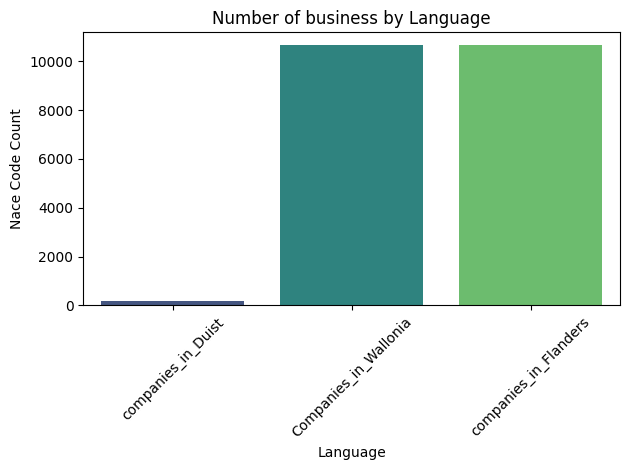

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=Region_df, x='form_status', y='number_of_businesses', palette='viridis')
plt.title('Number of business by Language')
plt.xlabel('Language')  
plt.ylabel('Nace Code Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Find growth trends by sector with year-over-year analysis

year over year analysis

In [20]:
query = """WITH yearly_counts AS (
        SELECT 
            CAST(SUBSTR(StartDate, 7, 4) AS INTEGER) AS establishment_year,
            COUNT(*) AS company_count
        FROM establishment
        WHERE StartDate NOT LIKE '%2015'
        GROUP BY CAST(SUBSTR(StartDate, 7, 4) AS INTEGER)
    )
    SELECT 
        establishment_year,
        company_count,
        LAG(company_count) OVER (ORDER BY establishment_year) AS prev_year_count,
        (company_count - LAG(company_count) OVER (ORDER BY establishment_year)) * 100.0 / 
        NULLIF(LAG(company_count) OVER (ORDER BY establishment_year), 0) AS yoy_percentage
    FROM yearly_counts
    WHERE 
    ORDER BY establishment_year;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.scatter(df['establishment_year'], df['yoy_percentage'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Year-over-Year Percentage Change in Company Establishments', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Percentage Change (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



ProgrammingError: Cannot operate on a closed database.

In [ ]:

import pandas as pd
import plotly.express as px

# Step 1: Connect to SQLite database
conn = sqlite3.connect(db_file)

# Step 2: Run the corrected SQL query
query = '''
    WITH yearly_counts AS (
        SELECT 
            CAST(SUBSTR(StartDate, 7, 4) AS INTEGER) AS establishment_year,
            COUNT(*) AS company_count
        FROM establishment
        GROUP BY CAST(SUBSTR(StartDate, 7, 4) AS INTEGER)
    )
    SELECT 
        establishment_year,
        company_count,
        LAG(company_count) OVER (ORDER BY establishment_year) AS prev_year_count,
        (company_count - LAG(company_count) OVER (ORDER BY establishment_year)) * 100.0 / 
        NULLIF(LAG(company_count) OVER (ORDER BY establishment_year), 0) AS yoy_percentage
    FROM yearly_counts
    ORDER BY establishment_year;
'''
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Filter rows with YoY% between 10 and 100
df_filtered = df[(df['yoy_percentage'] >= 10) & (df['yoy_percentage'] <= 100)]

# Step 4: Plot using Plotly
fig = px.scatter(
    df_filtered,
    x='establishment_year',
    y='yoy_percentage',
    title='Year-over-Year Percentage Change in Company Establishments (10%–100%)',
    labels={
        'establishment_year': 'Year',
        'yoy_percentage': 'YoY Percentage Change (%)'
    },
    template='plotly_white'
)

fig.update_traces(marker=dict(size=10, color='blue', line=dict(width=1, color='black')))
fig.update_layout(title_font_size=18, xaxis_title_font_size=14, yaxis_title_font_size=20,
                  width = 800,
                  height = 500
                  )
fig.show()

In [ ]:
import sqlite3
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Step 1: Connect to SQLite database
conn = sqlite3.connect(db_file)

# Step 2: Query data with YoY percentage and company counts
query = '''
    WITH yearly_counts AS (
        SELECT 
            CAST(SUBSTR(StartDate, 7, 4) AS INTEGER) AS establishment_year,
            COUNT(*) AS company_count
        FROM establishment
        GROUP BY CAST(SUBSTR(StartDate, 7, 4) AS INTEGER)
    )
    SELECT 
        establishment_year,
        company_count,
        LAG(company_count) OVER (ORDER BY establishment_year) AS prev_year_count,
        (company_count - LAG(company_count) OVER (ORDER BY establishment_year)) * 100.0 / 
        NULLIF(LAG(company_count) OVER (ORDER BY establishment_year), 0) AS yoy_percentage
    FROM yearly_counts
    ORDER BY establishment_year;
'''
df = pd.read_sql_query(query, conn)
conn.close()

# Filter YoY percentage between 10% and 100%
df_filtered = df[(df['yoy_percentage'] >= 10) & (df['yoy_percentage'] <= 100)]


x = df_filtered['establishment_year']
y = df_filtered['yoy_percentage']
coeffs = np.polyfit(x, y, deg=2)
x_fit = np.linspace(x.min(), x.max(), 300)
y_fit = np.polyval(coeffs, x_fit)


size_ref = 50  # adjust size scaling factor
marker_sizes = (df_filtered['company_count'] / df_filtered['company_count'].max()) * size_ref + 10

# Create Plotly figure
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Actual Data',
    marker=dict(
        size=marker_sizes,
        color=marker_sizes,              # color scaled by size
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Company Count in Each year'),
        line=dict(width=1, color='black'),
        symbol='diamond'
    ),
    hovertemplate=(
        'Year: %{x}<br>'
        'YoY: %{y:.2f}%<br>'
        'Companies: %{customdata}'
    ),
    customdata=df_filtered['company_count']
))

# Fitted curve
fig.add_trace(go.Scatter(
    x=x_fit,
    y=y_fit,
    mode='lines',
    name='Fitted Curve (Poly Deg 2)',
    line=dict(color='red', width=2),
    hoverinfo='skip'
))

# Layout with font sizes and legend position

fig.update_layout(
    width=1100,
    height=600,
    title='Year-over-Year % Change in Company Establishments with Fitting Curve',
    title_font=dict(size=24, family='Arial, sans-serif'),
    xaxis_title='Year',
    xaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=18)    # <-- adjust x-axis tick labels font size here
    ),
    yaxis_title='YoY Percentage Change (%)',
    yaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=18)    # <-- adjust y-axis tick labels font size here
    ),
    legend=dict(
        title='Legend',
        font=dict(size=22),
        x=0.55,
        y=1,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    template='plotly_white'
)

fig.show()


Find growth trends by sector with year-over-year analysis

In [88]:
conn = sqlite3.connect(db_file)

# SQL: Year-over-year by sector
query = '''
    WITH sector_year_counts AS (
        SELECT
            c.description AS sector,
            CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) AS establishment_year,
            COUNT(*) AS company_count
        FROM enterprise e
        JOIN code c ON c.Code = e.EnterpriseNumber
        GROUP BY Description, establishment_year
    ),
    sector_yoy AS (
        SELECT
            sector,
            establishment_year,
            company_count,
            LAG(company_count) OVER (
                PARTITION BY sector
                ORDER BY establishment_year
            ) AS prev_year_count,
            (company_count - LAG(company_count) OVER (
                PARTITION BY sector
                ORDER BY establishment_year
            )) * 100.0 /
            NULLIF(LAG(company_count) OVER (
                PARTITION BY sector
                ORDER BY establishment_year
            ), 0) AS yoy_percentage
        FROM sector_year_counts
    )
    SELECT *
    FROM sector_yoy
    WHERE yoy_percentage BETWEEN 10 AND 100
    ORDER BY sector, establishment_year;
'''

df = pd.read_sql_query(query, conn)
conn.close()

In [ ]:
size_ref = 40
df['marker_size'] = (df['company_count'] / df['company_count'].max()) * size_ref + 10

# Create Plotly scatter plot with facet per sector
fig = px.scatter(
    df,
    x='establishment_year',
    y='yoy_percentage',
    size='marker_size',
    color='sector',
    facet_col='sector',
    facet_col_wrap=3,  
    title='Year-over-Year Growth Trends by Sector',
    labels={
        'establishment_year': 'Year',
        'yoy_percentage': 'YoY Growth (%)'
    },
    template='plotly_white',
    opacity=0.8
)

# Update marker style
fig.update_traces(marker=dict(
    line=dict(width=1, color='black'),
    symbol='circle'
))

# Update layout fonts and sizing
fig.update_layout(
    width=1200,
    height=700,
    title_font=dict(size=22),
    legend=dict(
        font=dict(size=14),
        x=1.02, y=1,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='gray',
        borderwidth=1
    ),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Tick font size
fig.update_xaxes(tickfont=dict(size=13), title_font=dict(size=14))
fig.update_yaxes(tickfont=dict(size=13), title_font=dict(size=14))

fig.show()